In [17]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [18]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

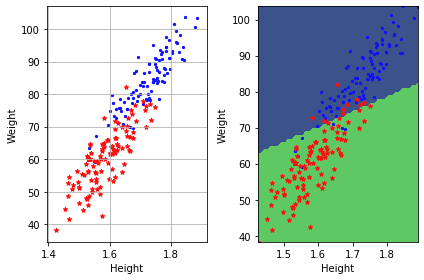

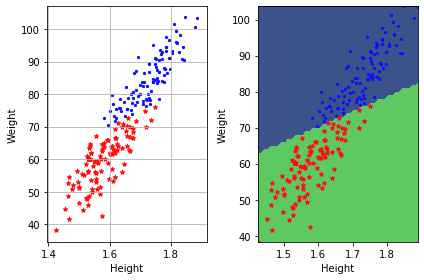

In [30]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx
    mse, w = least_squares(y, tx)
    
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
    y_pred = tx @ w
    y_pred = threshold(y_pred)
    
    visualization(y_pred, x, mean_x, std_x, w, "prediction_by_least_square")
    
def threshold(y):
    for i, y_i in enumerate(y):
        if y_i > 0.5:
            y[i] = 1
        else:
            y[i] = 0
    return y       

least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [31]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return np.exp(t) / (1 + np.exp(t))

In [63]:
# tx = np.c_[np.ones((y.shape[0], 1)), x]
# mse, w = least_squares(y, tx)
# print((tx).shape)
# print((w).shape)
# print((tx@w).shape)
# print((np.log(np.exp(tx@w)+1)).shape)
# print((y).shape)
# print((y * (tx@w)).shape)
# print(np.log(1 + np.exp(tx[1, :]@w)))

In [61]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return np.sum(np.log(1 + np.exp(tx@w)) - y * tx@w)

# calculate_loss(y, tx, w)

In [62]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    return tx.T@(sigmoid(tx@w) - y)

# calculate_gradient(y, tx, w)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [67]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
#     loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    gradient = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * gradient
    loss = calculate_loss(y, tx, w)
    return loss, w

Demo!

Current iteration=0, loss=133.10755089776137
Current iteration=100, loss=40.894907062150025
loss=40.89482569869041


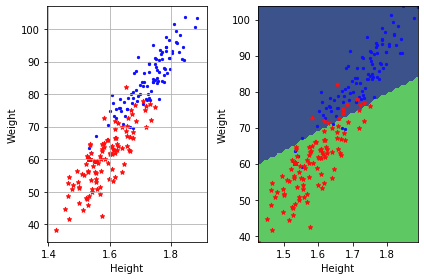

In [128]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [85]:
print(np.diag(np.array([1, 2, 3])))
print(sigmoid(tx@w).shape)

[[1 0 0]
 [0 2 0]
 [0 0 3]]
(200, 1)


In [103]:
print(( sigmoid(tx@w)*(1 - sigmoid(tx@w)) ).shape)

(200, 1)


In [110]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    S = np.diag((sigmoid(tx@w)*(1 - sigmoid(tx@w)))[:, 0])
    return tx.T@S@tx
calculate_hessian(y, tx, w)

array([[45.41128773,  3.60647157,  4.25640398],
       [ 3.60647157, 44.62864202, 40.74464575],
       [ 4.25640398, 40.74464575, 43.81990579]])

Write a function below to return loss, gradient, and hessian.

In [111]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian
# logistic_regression(y, tx, w)

### Using Newton's method
Use Newton's method for logistic regression.

In [114]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, gradient, hessian = logistic_regression(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * np.linalg.solve(hessian, gradient)
    return loss, w

demo

Current iteration=0, the loss=138.62943611198904
Current iteration=1, the loss=63.41155373909581
Current iteration=2, the loss=47.30458619935056
Current iteration=3, the loss=41.99746742248446
Current iteration=4, the loss=40.95639863723794
Current iteration=5, the loss=40.89511993648958
Current iteration=6, the loss=40.89482561762708
Current iteration=7, the loss=40.89482560989059
loss=40.89482560989058


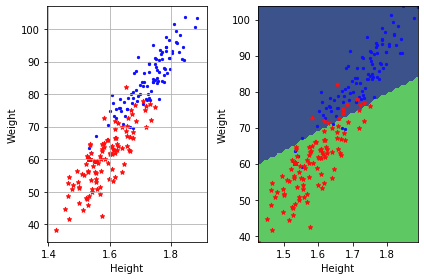

In [124]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [129]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    loss = loss + lambda_/2 * w.T@w
    gradient = calculate_gradient(y, tx, w) + lambda_ * w
    hessian = calculate_hessian(y, tx, w) + lambda_
    return loss, gradient, hessian

In [139]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - gamma * np.linalg.solve(hessian, gradient)
    loss = calculate_loss(y, tx, w)
    return loss, w

Current iteration=0, loss=137.341628710232
Current iteration=100, loss=71.77340018687318
Current iteration=200, loss=50.77096331024289
Current iteration=300, loss=43.788070005981766
Current iteration=400, loss=41.86865080255892
Current iteration=500, loss=41.39563480418661
Current iteration=600, loss=41.273445255458206
Current iteration=700, loss=41.23847009156627
Current iteration=800, loss=41.227668749042586
Current iteration=900, loss=41.22419102022654
Current iteration=1000, loss=41.22304638151145
Current iteration=1100, loss=41.22266467527721
Current iteration=1200, loss=41.222536179070005
Current iteration=1300, loss=41.222492574546834
Current iteration=1400, loss=41.222477666789246
Current iteration=1500, loss=41.22247253317863
Current iteration=1600, loss=41.22247075292283
loss=41.22247074293689


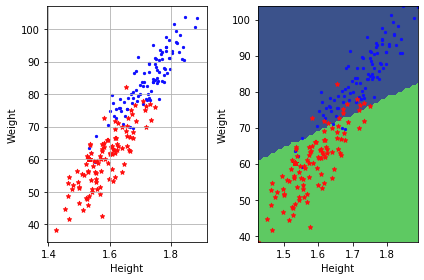

In [140]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)